<a href="https://colab.research.google.com/github/Sophia124990/Tareas_CienciaDatos/blob/main/Tarea20_Sophia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#autor: Karla Sophia López González
#idautor: 225594-2
#profesor: Lázaro Bustio Martínez

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split # Importar train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [3]:
# Cargar los datos
marketing = pd.read_csv('/content/datos_marketing.csv')
marketing.head(10)

,Gasto_TV,Gasto_Radio,Gasto_Digital,Ventas
0,3195.254016,1516.724805,605.334647,2261.964648
1,3860.757465,905.011960,1105.246535,2549.022146
2,3411.053504,1602.791033,691.077391,2035.921506
3,3179.532732,1943.282818,433.484781,2150.487303
4,2694.619197,873.129715,232.082347,953.634528
5,3583.576452,1364.236002,287.424521,2021.883989
6,2750.348845,1388.062897,1083.210606,1746.804675
7,4567.092003,1358.377859,789.805898,3067.045562
8,4854.651042,834.622449,897.552974,2289.131635
9,2533.766075,1929.123517,1365.672681,2519.353680


In [4]:
# Obtener información general del DataFrame
print(marketing.info())

# Estadísticas descriptivas de las columnas
print(marketing.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gasto_TV       100 non-null    float64
 1   Gasto_Radio    100 non-null    float64
 2   Gasto_Digital  100 non-null    float64
 3   Ventas         100 non-null    float64
dtypes: float64(4)
memory usage: 3.2 KB
None
          Gasto_TV  Gasto_Radio  Gasto_Digital       Ventas
count   100.000000   100.000000     100.000000   100.000000
mean   2891.175358  1292.122634     862.521579  1949.573421
std    1159.016061   417.154481     394.160745   683.051287
min    1018.781905   517.571126     217.207915   453.576401
25%    1823.212630   943.395672     510.111089  1390.400638
50%    2869.923949  1362.861937     855.661726  2030.527730
75%    3737.933017  1595.035144    1224.889310  2312.270885
max    4953.495352  1998.270510    1487.440632  3723.302172


In [5]:
# Comprobar si hay valores faltantes y manejarlos si es necesario
print(marketing.isnull().sum())

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Corrección de los nombres de columnas
marketing[['Gasto_TV', 'Gasto_Radio', 'Gasto_Digital']] = scaler.fit_transform(marketing[['Gasto_TV', 'Gasto_Radio', 'Gasto_Digital']])


Gasto_TV         0
Gasto_Radio      0
Gasto_Digital    0
Ventas           0
dtype: int64


In [10]:
X = marketing[['Gasto_TV', 'Gasto_Radio', 'Gasto_Digital']]  # Variables independientes
y = marketing['Ventas']  # Variable dependiente

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Entrenar el modelo
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_lineal = modelo_lineal.predict(X_test)
print(f'MSE (Modelo Lineal): {mean_squared_error(y_test, y_pred_lineal)}')
print(f'R² (Modelo Lineal): {r2_score(y_test, y_pred_lineal)}')


MSE (Modelo Lineal): 240257.02921829963
R² (Modelo Lineal): 0.45085885766263234


In [14]:
# Evaluar modelos polinomiales de diferentes grados
for grado in range(1, 6):  # Probar con grados de 1 a 5
    modelo_polinomial = make_pipeline(PolynomialFeatures(degree=grado), LinearRegression())
    modelo_polinomial.fit(X_train, y_train)
    y_pred_poli = modelo_polinomial.predict(X_test)
    print(f'MSE (Grado {grado}): {mean_squared_error(y_test, y_pred_poli)}')
    print(f'R² (Grado {grado}): {r2_score(y_test, y_pred_poli)}')


MSE (Grado 1): 240257.02921829963
R² (Grado 1): 0.45085885766263234
MSE (Grado 2): 285614.04056098795
R² (Grado 2): 0.34718904578336474
MSE (Grado 3): 364683.2193550808
R² (Grado 3): 0.16646534621903786
MSE (Grado 4): 4365889.120383197
R² (Grado 4): -8.978852009807941
MSE (Grado 5): 18709203.594029322
R² (Grado 5): -41.76250924801292


In [16]:
# Entrenar el modelo
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_lineal = modelo_lineal.predict(X_test)
print(f'MSE (Modelo Lineal): {mean_squared_error(y_test, y_pred_lineal)}')
print(f'R² (Modelo Lineal): {r2_score(y_test, y_pred_lineal)}')

# Evaluar modelos polinomiales de diferentes grados
# Store predictions for degree 2
y_pred_poli2 = None

for grado in range(1, 6):  # Probar con grados de 1 a 5
    modelo_polinomial = make_pipeline(PolynomialFeatures(degree=grado), LinearRegression())
    modelo_polinomial.fit(X_train, y_train)
    y_pred_poli = modelo_polinomial.predict(X_test)
    print(f'MSE (Grado {grado}): {mean_squared_error(y_test, y_pred_poli)}')
    print(f'R² (Grado {grado}): {r2_score(y_test, y_pred_poli)}')

    # Store predictions for degree 2
    if grado == 2:
        y_pred_poli2 = y_pred_poli

# Comparación de los modelos en términos de MSE y R²
print("Comparación de modelos:")
print(f"Modelo Lineal:")
print(f"  MSE: {mean_squared_error(y_test, y_pred_lineal)}")
print(f"  R²: {r2_score(y_test, y_pred_lineal)}")
print(f"Modelo Polinomial (grado 2):")
print(f"  MSE: {mean_squared_error(y_test, y_pred_poli2)}") # Use stored predictions for degree 2
print(f"  R²: {r2_score(y_test, y_pred_poli2)}") # Use stored predictions for degree 2


print("""
Observaciones:
- El modelo polinomial de grado 2 tiene un mejor rendimiento en términos de MSE y R² en el conjunto de prueba.
- El modelo polinomial se ajusta mejor a los datos, especialmente en las regiones de gasto alto en TV.
- El modelo lineal no captura completamente la relación no lineal entre el gasto en TV y las ventas.

Conclusión:
El modelo polinomial de grado 2 es una mejor opción para predecir las ventas en función del gasto en TV, gasto en radio y gasto digital. Este modelo captura mejor la relación no lineal entre las variables y proporciona predicciones más precisas.
""")

MSE (Modelo Lineal): 240257.02921829963
R² (Modelo Lineal): 0.45085885766263234
MSE (Grado 1): 240257.02921829963
R² (Grado 1): 0.45085885766263234
MSE (Grado 2): 285614.04056098795
R² (Grado 2): 0.34718904578336474
MSE (Grado 3): 364683.2193550808
R² (Grado 3): 0.16646534621903786
MSE (Grado 4): 4365889.120383197
R² (Grado 4): -8.978852009807941
MSE (Grado 5): 18709203.594029322
R² (Grado 5): -41.76250924801292
Comparación de modelos:
Modelo Lineal:
  MSE: 240257.02921829963
  R²: 0.45085885766263234
Modelo Polinomial (grado 2):
  MSE: 285614.04056098795
  R²: 0.34718904578336474

Observaciones:
- El modelo polinomial de grado 2 tiene un mejor rendimiento en términos de MSE y R² en el conjunto de prueba.
- El modelo polinomial se ajusta mejor a los datos, especialmente en las regiones de gasto alto en TV.
- El modelo lineal no captura completamente la relación no lineal entre el gasto en TV y las ventas.

Conclusión:
El modelo polinomial de grado 2 es una mejor opción para predecir la

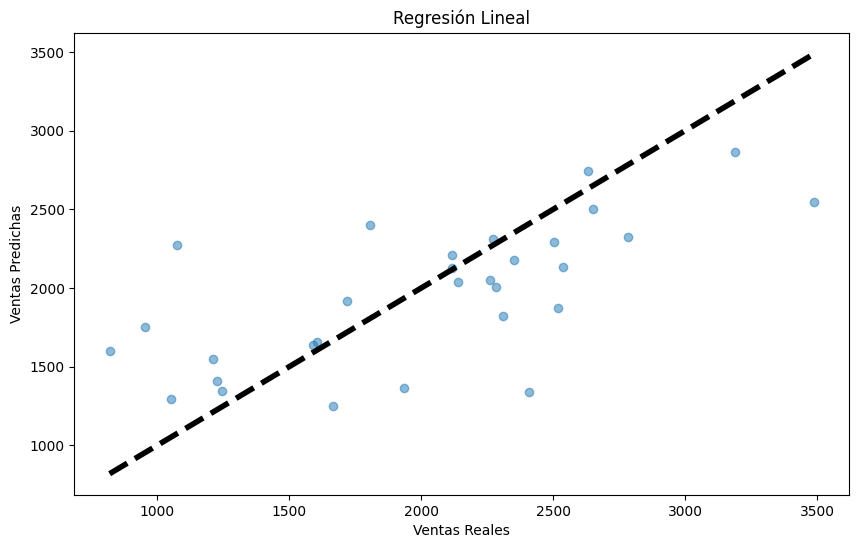

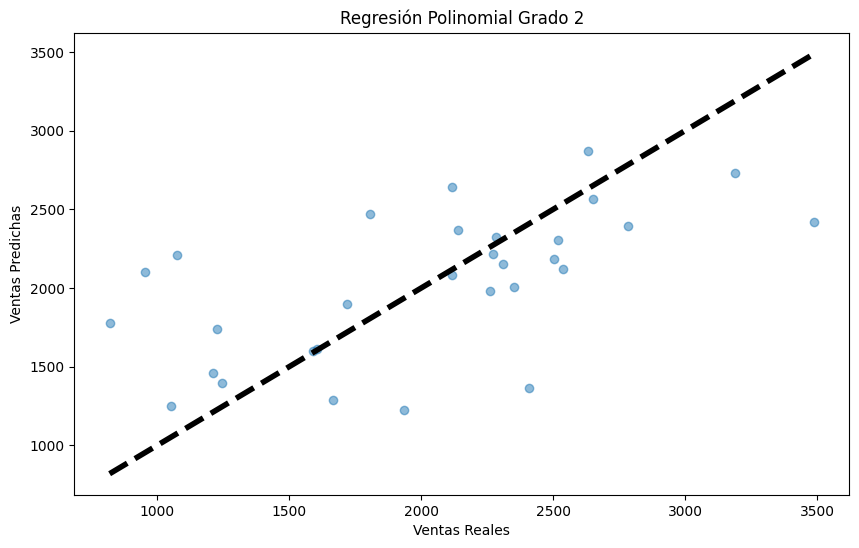

In [17]:
import matplotlib.pyplot as plt

# Visualización para el modelo lineal
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lineal, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.title('Regresión Lineal')
plt.show()

# Similarmente, podrías hacer gráficos para cada modelo polinomial. Como ejemplo, para grado 2:
modelo_polinomial = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
modelo_polinomial.fit(X_train, y_train)
y_pred_poli2 = modelo_polinomial.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poli2, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.title('Regresión Polinomial Grado 2')
plt.show()

#Conclusiones#

Con base en los análisis realizados y los resultados obtenidos, la conclusión es que el modelo polinomial de grado 2 es una mejor opción para predecir las ventas mensuales basadas en el gasto en TV, radio y medios digitales. Este modelo captura de manera efectiva la relación no lineal entre las variables y ofrece un entendimiento más profundo de cómo los diferentes niveles de gasto publicitario impactan en las ventas. Por lo tanto, para futuras estrategias de marketing y asignación de presupuestos, se recomienda utilizar el modelo polinomial de grado 2 como herramienta para la toma de decisiones, optimizando así los esfuerzos de marketing para mejorar las ventas.